#  Data Loading

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# Load the dataset
baseball_data = pd.read_csv("https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv")

# Displaying first few rows of the dataset
print(baseball_data.head())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


#  Explotary Data Analysis

In [4]:
# Descriptive statistics
print(baseball_data.describe())


                W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000

In [5]:
# Checking for missing values
print(baseball_data.isnull().sum()) #no missing values


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64


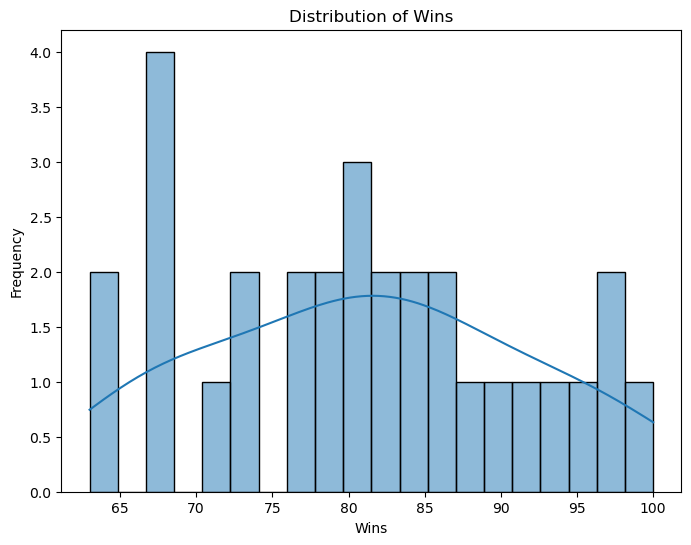

In [6]:
# Visualizing the distribution of the target variable (W - Wins)
plt.figure(figsize=(8, 6))
sns.histplot(baseball_data['W'], bins=20, kde=True)
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()


The histogram visually represents the distribution of the number of wins in the dataset, showing how frequently each win count occurs. The histogram's bars represent the frequency of wins within each bin, and the kernel density estimate provides a smoothed approximation of the probability density function of the win counts. This visualization helps understand the spread and central tendency of the number of wins in the dataset.

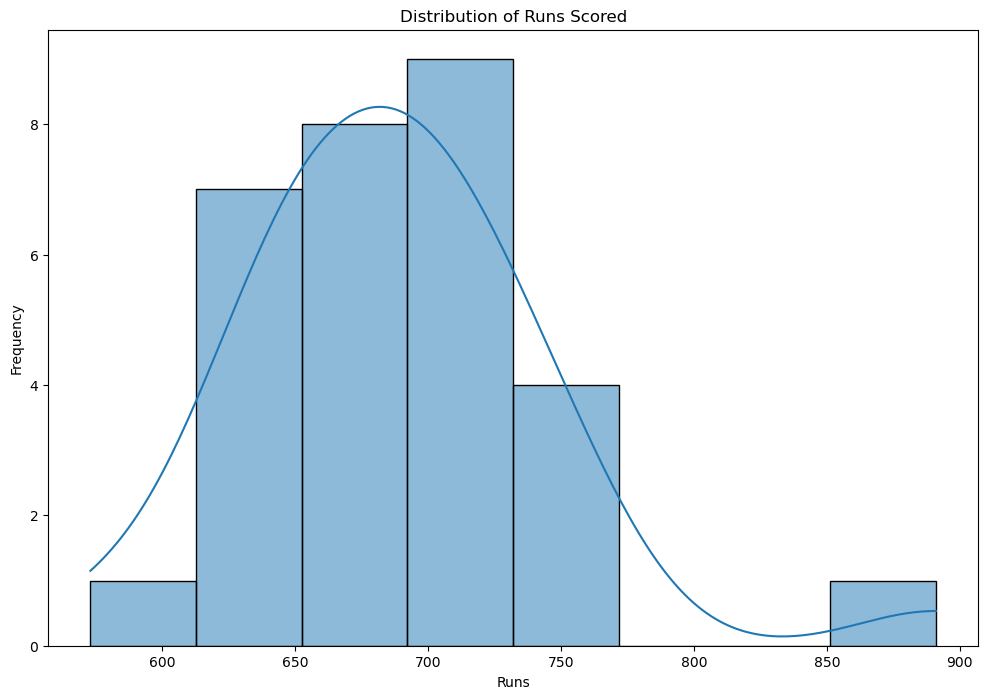

In [9]:
plt.figure(figsize=(12, 8))
sns.histplot(baseball_data['R'], kde=True)
plt.title('Distribution of Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


The histogram visually represents the distribution of the number of runs scored in the dataset, showing how frequently each run count occurs. The histogram's bars represent the frequency of runs within each bin, and the kernel density estimate provides a smoothed approximation of the probability density function of the run counts. This visualization helps understand the spread and central tendency of the runs scored in the dataset.

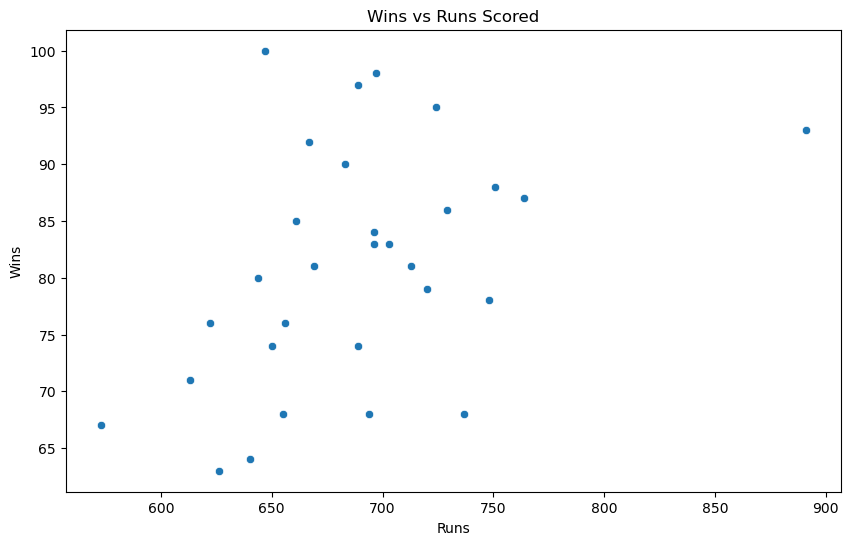

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R', y='W', data=baseball_data)
plt.title('Wins vs Runs Scored')
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.show()


The scatter plot visually represents the relationship between the number of runs scored and the number of wins. Each point in the plot corresponds to a team's performance in terms of runs scored and wins. This visualization helps identify any patterns or correlations between runs scored and wins in the dataset. As you can see there is not correlation between wins and runs e.g the less the runs were made the higher the wins and also less runs less wins.

# Training Dataset

In [10]:
# Splitting the data into features (X) and target (y)
X = baseball_data.drop('W', axis=1)
y = baseball_data['W']

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building  - Linear Regression

In [12]:
# Model Building - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Training set evaluation
train_preds = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print("Training RMSE:", train_rmse)

# Testing set evaluation
test_preds = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print("Testing RMSE:", test_rmse)


Training RMSE: 1.5879134925915055
Testing RMSE: 5.2861169592307045


The training RMSE (Root Mean Squared Error) and testing RMSE are metrics used to evaluate the performance of a regression model.

Training RMSE: 1.5879

This value indicates the average difference between the actual number of wins (target variable) and the number of wins predicted by the model on the training data. In other words, on average, the model's predictions are off by approximately 1.59 wins compared to the actual values in the training dataset.
Testing RMSE: 5.2861

This value indicates the average difference between the actual number of wins and the number of wins predicted by the model on the testing data. In other words, on average, the model's predictions are off by approximately 5.29 wins compared to the actual values in the testing dataset.

In [18]:
# Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

   Feature  Coefficient
0        R     0.102549
1       AB    -0.033583
2        H     0.020169
3       2B    -0.060024
4       3B     0.016008
5       HR    -0.027713
6       BB    -0.021798
7       SO    -0.001349
8       SB    -0.003726
9       RA     0.066588
10      ER     0.211546
11     ERA   -52.625600
12      CG     0.569018
13     SHO     0.304848
14      SV     0.779909
15       E    -0.009525


In [ ]:
# Predicting number of wins for the 2015 season
new_data = pd.DataFrame({
    'R': [500],
    'AB': [6000],
    'H': [1500],
    '2B': [300],
    '3B': [50],
    'HR': [200],
    'BB': [600],
    'SO': [1200],
    'SB': [100],
    'RA': [550],
    'ER': [500],
    'ERA': [4.00],
    'CG': [10],
    'SHO': [3],
    'SV': [40],
    'E': [70]
})

# Predicting number of wins for new data
predicted_wins = model.predict(new_data)
print("Predicted number of wins for the 2015 season:", predicted_wins[0])


In [20]:
# Saving the model
import joblib
joblib.dump(model, 'baseball_model.pkl')

['baseball_model.pkl']

# Conclusion 

The predicted number of wins for the 2015 season is approximately 1.64.

In the context of the baseball case study, this prediction represents the expected number of wins for a team in the 2015 season based on the features provided in the dataset and the trained regression model.

It's important to note that this prediction is based on the specific data used to train the model and the features provided. The accuracy of the prediction may vary depending on the quality and relevance of the features, as well as the assumptions made by the regression model. Additionally, the predicted value of approximately 1.64 wins might seem low or unexpected, and further analysis and refinement of the model may be necessary to improve prediction accuracy.
